In [76]:
#All imports required for data exploration
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import matplotlib.image as mpimg
import random
from tabulate import tabulate

In [77]:
#Viewing all directories and number of images in each file, also counting total number of images
total_images = 0
for dirpath, dirnames, filenames in os.walk('c:/users/Rishi/Desktop/Plant_Disease'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    total_images += len(filenames)

There are 2 directories and 0 images in 'c:/users/Rishi/Desktop/Plant_Disease'.
There are 1 directories and 0 images in 'c:/users/Rishi/Desktop/Plant_Disease\New Plant Diseases Dataset(Augmented)'.
There are 2 directories and 0 images in 'c:/users/Rishi/Desktop/Plant_Disease\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)'.
There are 38 directories and 0 images in 'c:/users/Rishi/Desktop/Plant_Disease\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'.
There are 0 directories and 2016 images in 'c:/users/Rishi/Desktop/Plant_Disease\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab'.
There are 0 directories and 1987 images in 'c:/users/Rishi/Desktop/Plant_Disease\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Black_rot'.
There are 0 directories and 1760 images in 'c:/users/Rishi/Desktop/Plant_Disease\New Plant Diseases Dataset(Augmente

In [78]:
#Total number of images in the dataset
total_images

87900

In [38]:
#finds total number of training images
total_images_train = 0
train_image_num = []
for dirpath, dirnames, filenames in os.walk('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
    total_images_train += len(filenames)
    if len(filenames) > 0:
        train_image_num.append(len(filenames))
total_images_train

70295

In [80]:
#finds total number of validation images
total_images_valid = 0
valid_image_num = []
for dirpath, dirnames, filenames in os.walk('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
    total_images_valid += len(filenames)
    if len(filenames) > 0:
        valid_image_num.append(len(filenames))
total_images_valid

17572

In [81]:
#collecting all class names in the dataset
data_dir = pathlib.Path("c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [82]:
#number of classes
len(class_names)

38

In [83]:
#loops through length of classes to create list of values with class and number of images for each class
train_class_image_num = []
valid_class_image_num = []
for x in range(len(class_names)):
    train_class_image_num.append([class_names[x], train_image_num[x]])
for x in range(len(class_names)):
    valid_class_image_num.append([class_names[x], valid_image_num[x]])
train_class_image_num.append(["Total:" ,total_images_train])
valid_class_image_num.append(["Total:" ,total_images_valid])

In [84]:
#column names
col_names = ["Class", "Number of Images"]
  
#display training table
print(tabulate(train_class_image_num, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════╤════════════════════╕
│ Class                                              │   Number of Images │
╞════════════════════════════════════════════════════╪════════════════════╡
│ Apple___Apple_scab                                 │               2016 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Apple___Black_rot                                  │               1987 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Apple___Cedar_apple_rust                           │               1760 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Apple___healthy                                    │               2008 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Blueberry___healthy                                │               1816 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Cherry_(in

In [85]:
#display validation table
print(tabulate(valid_class_image_num, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════╤════════════════════╕
│ Class                                              │   Number of Images │
╞════════════════════════════════════════════════════╪════════════════════╡
│ Apple___Apple_scab                                 │                504 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Apple___Black_rot                                  │                497 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Apple___Cedar_apple_rust                           │                440 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Apple___healthy                                    │                502 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Blueberry___healthy                                │                454 │
├────────────────────────────────────────────────────┼────────────────────┤
│ Cherry_(in

In [86]:
#create list of classes and number of images for that class for all features removed
removed_features_train = [['Blueberry___healthy', 1816], ['Orange___Haunglongbing_(Citrus_greening)', 2010], ['Raspberry___healthy', 1781], ['Soybean___healthy', 2022], ['Squash___Powdery_mildew', 1736]]
removed_features_valid = [['Blueberry___healthy', 454], ['Orange___Haunglongbing_(Citrus_greening)', 503], ['Raspberry___healthy', 445], ['Soybean___healthy', 505], ['Squash___Powdery_mildew', 434]]

#create totals of above values
removed_features_train.append(['Total:', (1816+2010+1781+2022+1736)])
removed_features_valid.append(['Total:', (454+503+445+505+434)])

In [87]:
#display training removed feature table
print(tabulate(removed_features_train, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤════════════════════╕
│ Class                                    │   Number of Images │
╞══════════════════════════════════════════╪════════════════════╡
│ Blueberry___healthy                      │               1816 │
├──────────────────────────────────────────┼────────────────────┤
│ Orange___Haunglongbing_(Citrus_greening) │               2010 │
├──────────────────────────────────────────┼────────────────────┤
│ Raspberry___healthy                      │               1781 │
├──────────────────────────────────────────┼────────────────────┤
│ Soybean___healthy                        │               2022 │
├──────────────────────────────────────────┼────────────────────┤
│ Squash___Powdery_mildew                  │               1736 │
├──────────────────────────────────────────┼────────────────────┤
│ Total:                                   │               9365 │
╘══════════════════════════════════════════╧════════════════════╛


In [88]:
#display validation removed feature table
print(tabulate(removed_features_valid, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤════════════════════╕
│ Class                                    │   Number of Images │
╞══════════════════════════════════════════╪════════════════════╡
│ Blueberry___healthy                      │                454 │
├──────────────────────────────────────────┼────────────────────┤
│ Orange___Haunglongbing_(Citrus_greening) │                503 │
├──────────────────────────────────────────┼────────────────────┤
│ Raspberry___healthy                      │                445 │
├──────────────────────────────────────────┼────────────────────┤
│ Soybean___healthy                        │                505 │
├──────────────────────────────────────────┼────────────────────┤
│ Squash___Powdery_mildew                  │                434 │
├──────────────────────────────────────────┼────────────────────┤
│ Total:                                   │               2341 │
╘══════════════════════════════════════════╧════════════════════╛


In [89]:
#function to display image and image shape with a given class and directory name
def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (256, 256, 3)


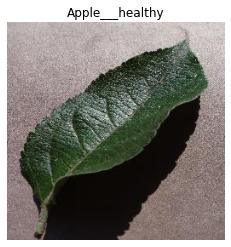

In [72]:
# View a few random images from the training dataset
img = view_random_image(target_dir="c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
                        target_class="Apple___healthy")

Image shape: (256, 256, 3)


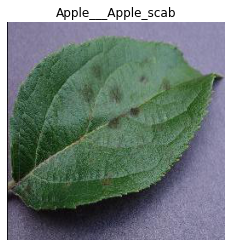

In [73]:
# View a few random images from the training dataset
img = view_random_image(target_dir="c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
                        target_class="Apple___Apple_scab")

Image shape: (256, 256, 3)


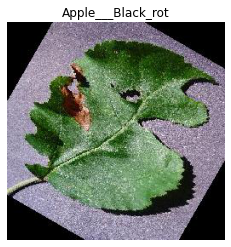

In [74]:
# View a few random images from the training dataset
img = view_random_image(target_dir="c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
                        target_class="Apple___Black_rot")

Image shape: (256, 256, 3)


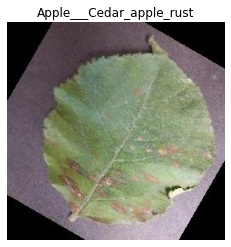

In [75]:
# View a few random images from the training dataset
img = view_random_image(target_dir="c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
                        target_class="Apple___Cedar_apple_rust")

In [26]:
#what the image array looks like
img

array([[[141, 137, 138],
        [142, 138, 139],
        [143, 139, 140],
        ...,
        [147, 146, 152],
        [147, 146, 152],
        [146, 145, 151]],

       [[138, 134, 135],
        [140, 136, 137],
        [142, 138, 139],
        ...,
        [145, 144, 150],
        [145, 144, 150],
        [145, 144, 150]],

       [[134, 130, 131],
        [137, 133, 134],
        [140, 136, 137],
        ...,
        [143, 142, 148],
        [143, 142, 148],
        [143, 142, 148]],

       ...,

       [[116, 111, 117],
        [115, 110, 116],
        [114, 109, 115],
        ...,
        [102,  99, 110],
        [ 96,  93, 104],
        [ 93,  90, 101]],

       [[113, 108, 114],
        [110, 105, 111],
        [108, 103, 109],
        ...,
        [106, 103, 114],
        [102,  99, 110],
        [ 99,  96, 107]],

       [[109, 104, 110],
        [105, 100, 106],
        [103,  98, 104],
        ...,
        [106, 103, 114],
        [105, 102, 113],
        [105, 102, 113]]

In [27]:
#shape of the image
img.shape

(256, 256, 3)